# BWT - Deep Learning Track
## Task#30: Recurrent Neural Network, LSTM, GRU
### Adil Mubashir Chaudhry

#### RNNs


Recurrent Neural Networks (RNNs) are a type of artificial neural network designed to process sequential data. Unlike traditional feedforward neural networks, RNNs have the ability to retain information from previous steps and utilize it to make predictions or generate outputs. This recurrent nature enables RNNs to effectively handle time series data, natural language processing tasks, and other sequential problems. RNNs are characterized by their recurrent connections, which form a loop that allows information to flow from one step to the next, enabling them to capture dependencies and patterns across the sequence. This unique architecture makes RNNs powerful tools for tasks such as language modeling, speech recognition, machine translation, and sentiment analysis.

In [1]:
from keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_features = 10000
maxlen = 500
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data( num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [2]:
from tensorflow.keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import SimpleRNN


model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,epochs=10,batch_size=128,validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 43s 255ms/step - loss: 0.5908 - acc: 0.6773 - val_loss: 0.4678 - val_acc: 0.7976
Epoch 2/10
157/157 [==============================] - 38s 241ms/step - loss: 0.3829 - acc: 0.8390 - val_loss: 0.4276 - val_acc: 0.8262
Epoch 3/10
157/157 [==============================] - 19s 123ms/step - loss: 0.3092 - acc: 0.8771 - val_loss: 0.4182 - val_acc: 0.8240
Epoch 4/10
157/157 [==============================] - 14s 91ms/step - loss: 0.2575 - acc: 0.9003 - val_loss: 0.4501 - val_acc: 0.7932
Epoch 5/10
157/157 [==============================] - 15s 95ms/step - loss: 0.2099 - acc: 0.9225 - val_loss: 0.3980 - val_acc: 0.8222
Epoch 6/10
157/157 [==============================] - 15s 98ms/step - loss: 0.1672 - acc: 0.9390 - val_loss: 0.3706 - val_acc: 0.8522
Epoch 7/10
157/157 [==============================] - 14s 89ms/step - loss: 0.1313 - acc: 0.9535 - val_loss: 0.5310 - val_acc: 0.7784
Epoch 8/10
157/157 [==============================] - 14s 8

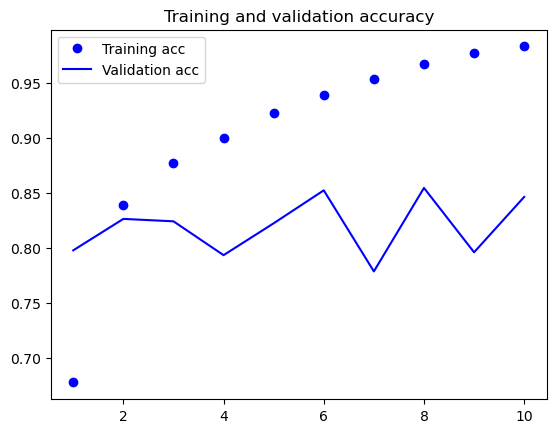

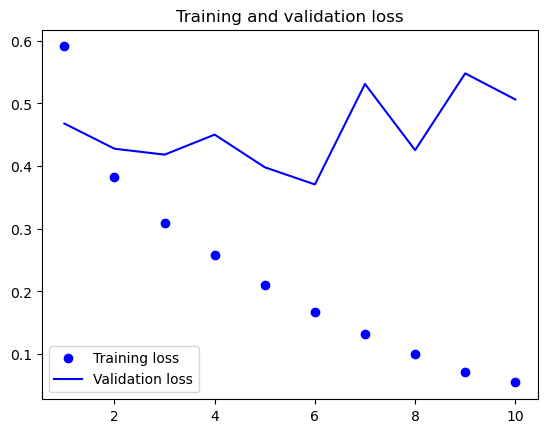

In [3]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')

plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

#### LSTM and GRU Layers

Long Short-Term Memory (LSTM) and Gated Recurrent Unit (GRU) are specialized types of recurrent neural network (RNN) layers that address the vanishing gradient problem and improve the ability of RNNs to capture long-term dependencies in sequential data. LSTMs and GRUs achieve this by introducing gating mechanisms that selectively retain and forget information at each time step.

LSTMs consist of memory cells that maintain an internal state, which serves as a long-term memory. These cells are equipped with three gating units: the input gate, forget gate, and output gate. The input gate controls the flow of new information into the memory cell, while the forget gate regulates the retention or removal of information from the memory. Finally, the output gate determines how much of the internal state should be revealed as the output at a particular time step. This intricate gating mechanism allows LSTMs to effectively handle long-range dependencies and alleviate the vanishing gradient problem.

GRUs are a simplified variant of LSTMs that combine the memory cell and hidden state into a single update gate. GRUs possess two gating units: the update gate and reset gate. The update gate controls how much of the previous hidden state is retained and how much of the new candidate state is added to the current state. The reset gate determines how much of the previous hidden state is forgotten when computing the candidate state. By utilizing these gating units, GRUs provide a more streamlined architecture compared to LSTMs while still being capable of capturing long-term dependencies in sequential data.

Both LSTM and GRU layers have proven to be highly effective in various tasks involving sequential data, including machine translation, speech recognition, sentiment analysis, and natural language processing, by allowing RNNs to learn and model complex patterns over extended sequences.

In [4]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['acc'])

history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 34s 205ms/step - loss: 0.6063 - acc: 0.6621 - val_loss: 0.4563 - val_acc: 0.8086
Epoch 2/10
157/157 [==============================] - 31s 199ms/step - loss: 0.3579 - acc: 0.8529 - val_loss: 0.3283 - val_acc: 0.8620
Epoch 3/10
157/157 [==============================] - 32s 203ms/step - loss: 0.2817 - acc: 0.8900 - val_loss: 0.3176 - val_acc: 0.8672
Epoch 4/10
157/157 [==============================] - 31s 195ms/step - loss: 0.2307 - acc: 0.9135 - val_loss: 0.3332 - val_acc: 0.8594
Epoch 5/10
157/157 [==============================] - 30s 193ms/step - loss: 0.2020 - acc: 0.9255 - val_loss: 0.3026 - val_acc: 0.8706
Epoch 6/10
157/157 [==============================] - 30s 190ms/step - loss: 0.1805 - acc: 0.9345 - val_loss: 0.4570 - val_acc: 0.8672
Epoch 7/10
157/157 [==============================] - 30s 189ms/step - loss: 0.1645 - acc: 0.9409 - val_loss: 0.3262 - val_acc: 0.8828
Epoch 8/10
157/157 [==============================] - 3

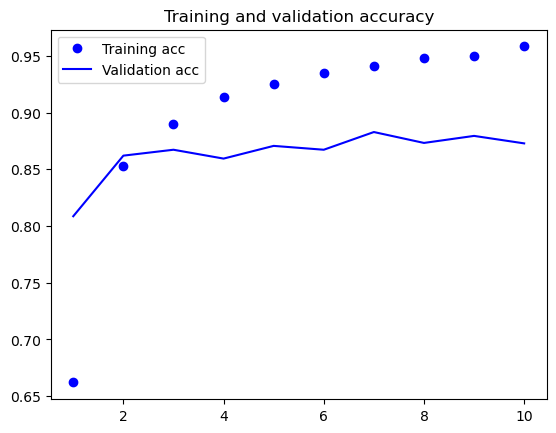

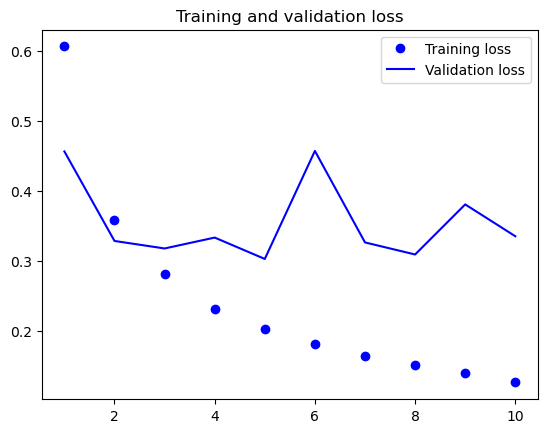

In [5]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')

plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()